Paso 1: Cargar, Explorar y Limpiar el Dataset

In [193]:
import pandas as pd

# Cargar el dataset
file_path = "post_processed_car_data_with_id.csv"  # Asegúrate de que la ruta sea correcta
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar la estructura
print(df.head())

# Mostrar información general sobre el dataset
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

                  Maker                     Version  Price  \
0            Abarth 595  595C 1.4T JET TURISMO AUT.  17990   
1            Abarth 595  595C 1.4T JET TURISMO AUT.  19090   
2  Alfa Romeo Giulietta            1.6JTD Super 120  13890   
3    Alfa Romeo Stelvio      2.0 Veloce Q4 Aut. 280  33790   
4    Alfa Romeo Stelvio            2.2 RWD Aut. 180  19990   

                                        URL Producto  \
0  https://www.clicars.com/coches-segunda-mano-oc...   
1  https://www.clicars.com/coches-segunda-mano-oc...   
2  https://www.clicars.com/coches-segunda-mano-oc...   
3  https://www.clicars.com/coches-segunda-mano-oc...   
4  https://www.clicars.com/coches-segunda-mano-oc...   

                                          URL Imagen  Year        Kms  \
0  https://storage.googleapis.com/clicars-storage...  2021   63.037km   
1  https://storage.googleapis.com/clicars-storage...  2021   63.843km   
2  https://storage.googleapis.com/clicars-storage...  2019  139.240km  

In [194]:
# Verificar valores nulos en cada columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar registros duplicados
print("\nNúmero de registros duplicados:", df.duplicated().sum())

Valores nulos por columna:
Maker               0
Version             5
Price               0
URL Producto        0
URL Imagen          0
Year                0
Kms                 0
Potencia            0
Caja_velocidades    0
presupuesto         0
tipo_combustible    0
Puertas             0
Plazas              0
Marca               0
car_id              0
dtype: int64

Número de registros duplicados: 0


In [195]:
# Filtrar y mostrar los registros que tienen valores nulos en la columna 'Version'
df_nulls = df[df["Version"].isnull()]
print(df_nulls)

                    Maker Version  Price  \
419   Citroen C3 Aircross     NaN  12690   
475            Citroen C4     NaN   8090   
1234             Lexus UX     NaN  21390   
2034     Peugeot 3008 SUV     NaN  23790   
2581            SEAT León     NaN  12990   

                                           URL Producto  \
419   https://www.clicars.com/coches-segunda-mano-oc...   
475   https://www.clicars.com/coches-segunda-mano-oc...   
1234  https://www.clicars.com/coches-segunda-mano-oc...   
2034  https://www.clicars.com/coches-segunda-mano-oc...   
2581  https://www.clicars.com/coches-segunda-mano-oc...   

                                             URL Imagen  Year        Kms  \
419   https://storage.googleapis.com/clicars-storage...  2021   46.630km   
475   https://storage.googleapis.com/clicars-storage...  2015  144.213km   
1234  https://storage.googleapis.com/clicars-storage...  2019   64.762km   
2034  https://storage.googleapis.com/clicars-storage...  2024   17.797km   


In [196]:
# Función para corregir los valores nulos en 'Version'
def fix_missing_version(row):
    if pd.isnull(row["Version"]):  # Si la versión está vacía
        words = row["Maker"].split(" ", 1)  # Separar por el primer espacio
        if len(words) > 1:
            row["Maker"] = words[0]  # Primera palabra en 'Maker'
            row["Version"] = words[1]  # Resto en 'Version'
    return row

# Aplicar la corrección solo a las filas afectadas
df.loc[df["Version"].isnull()] = df[df["Version"].isnull()].apply(fix_missing_version, axis=1)

# Verificar si se ha corregido
print(df.loc[[419, 475, 1234, 2034, 2581]])  # Mostrar solo los registros afectados

        Maker      Version  Price  \
419   Citroen  C3 Aircross  12690   
475   Citroen           C4   8090   
1234    Lexus           UX  21390   
2034  Peugeot     3008 SUV  23790   
2581     SEAT         León  12990   

                                           URL Producto  \
419   https://www.clicars.com/coches-segunda-mano-oc...   
475   https://www.clicars.com/coches-segunda-mano-oc...   
1234  https://www.clicars.com/coches-segunda-mano-oc...   
2034  https://www.clicars.com/coches-segunda-mano-oc...   
2581  https://www.clicars.com/coches-segunda-mano-oc...   

                                             URL Imagen  Year        Kms  \
419   https://storage.googleapis.com/clicars-storage...  2021   46.630km   
475   https://storage.googleapis.com/clicars-storage...  2015  144.213km   
1234  https://storage.googleapis.com/clicars-storage...  2019   64.762km   
2034  https://storage.googleapis.com/clicars-storage...  2024   17.797km   
2581  https://storage.googleapis.com/clica

In [197]:
# Limpiar 'Kms' (eliminar 'km' y convertir a número)
df["Kms"] = df["Kms"].str.replace('km', '', regex=False).str.replace('.', '', regex=False).astype(int)

# Limpiar 'Potencia' (eliminar 'CV' y convertir a número)
df["Potencia"] = df["Potencia"].str.replace('CV', '', regex=False).astype(int)

# Verificar que las conversiones se realizaron correctamente
print(df[["Kms", "Potencia"]].head())

      Kms  Potencia
0   63037       165
1   63843       165
2  139240       120
3   54887       280
4  134069       180


In [198]:
# Eliminar la columna 'presupuesto'
df = df.drop(columns=['presupuesto'])

# Mostrar las columnas restantes
print("Columnas restantes en el DataFrame:")
print(df.columns)

Columnas restantes en el DataFrame:
Index(['Maker', 'Version', 'Price', 'URL Producto', 'URL Imagen', 'Year',
       'Kms', 'Potencia', 'Caja_velocidades', 'tipo_combustible', 'Puertas',
       'Plazas', 'Marca', 'car_id'],
      dtype='object')


In [199]:
# Guardar las URLs en un DataFrame separado para usarlas más tarde
urls = df[['URL Producto', 'URL Imagen']]

# Eliminar las columnas innecesarias
df = df.drop(columns=['Marca', 'car_id', 'URL Producto', 'URL Imagen'])

# Verificar las columnas restantes
print("Columnas después de la limpieza:")
print(df.columns)

Columnas después de la limpieza:
Index(['Maker', 'Version', 'Price', 'Year', 'Kms', 'Potencia',
       'Caja_velocidades', 'tipo_combustible', 'Puertas', 'Plazas'],
      dtype='object')


Paso 2: Convertir Variables Categóricas a Numéricas

In [200]:
# Aplicar One-Hot Encoding a 'tipo_combustible' y 'Caja_velocidades'
df = pd.get_dummies(df, columns=['tipo_combustible', 'Caja_velocidades'], drop_first=True)

# Verificar que las columnas categóricas han sido transformadas correctamente
print("Columnas después de One-Hot Encoding:")
print(df.columns)

Columnas después de One-Hot Encoding:
Index(['Maker', 'Version', 'Price', 'Year', 'Kms', 'Potencia', 'Puertas',
       'Plazas', 'tipo_combustible_Electrico', 'tipo_combustible_Gasolina',
       'tipo_combustible_Hibrido', 'Caja_velocidades_Manual'],
      dtype='object')


Paso 3: Normalizar los Datos

In [201]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas (excluyendo 'Maker' y 'Version')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Aplicar normalización con StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])

# Convertir a DataFrame conservando los nombres de las columnas
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

# Verificar la normalización
print("Primeras filas del DataFrame normalizado:")
print(df_scaled.head())

Primeras filas del DataFrame normalizado:
      Price      Year   Puertas    Plazas
0 -0.101544 -0.072287  0.123276 -3.437967
1  0.028725 -0.072287  0.123276 -3.437967
2 -0.587089 -1.014017  0.123276  0.117547
3  1.769582 -0.543152  0.123276  0.117547
4  0.135308 -1.955748  0.123276  0.117547


Paso 4: Visualizar la Correlación Entre Variables con un Heatmap

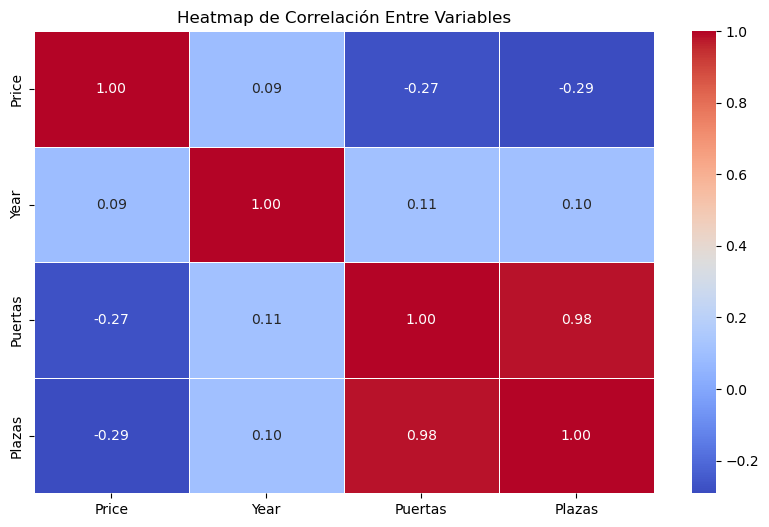

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_scaled.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación Entre Variables")
plt.show()

Paso 4.1: Verificar qué columnas están en df_scaled

In [203]:
print("Columnas en df_scaled:")
print(df_scaled.columns)

Columnas en df_scaled:
Index(['Price', 'Year', 'Puertas', 'Plazas'], dtype='object')


Paso 4.2: Normalizar Todas las Variables Numéricas

In [204]:
from sklearn.preprocessing import StandardScaler

# Seleccionar todas las columnas numéricas (excluyendo 'Maker' y 'Version')
numeric_columns = df.columns.difference(['Maker', 'Version'])  # Excluimos solo las categóricas originales
df_scaled = df[numeric_columns]  # Seleccionar todas las variables numéricas

# Aplicar normalización con StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Convertir a DataFrame conservando los nombres de las columnas
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

# Verificar que ahora todas las columnas han sido normalizadas
print("Columnas en df_scaled después de la corrección:")
print(df_scaled.columns)

Columnas en df_scaled después de la corrección:
Index(['Caja_velocidades_Manual', 'Kms', 'Plazas', 'Potencia', 'Price',
       'Puertas', 'Year', 'tipo_combustible_Electrico',
       'tipo_combustible_Gasolina', 'tipo_combustible_Hibrido'],
      dtype='object')


Paso 4.3: Generar el Heatmap de Correlación

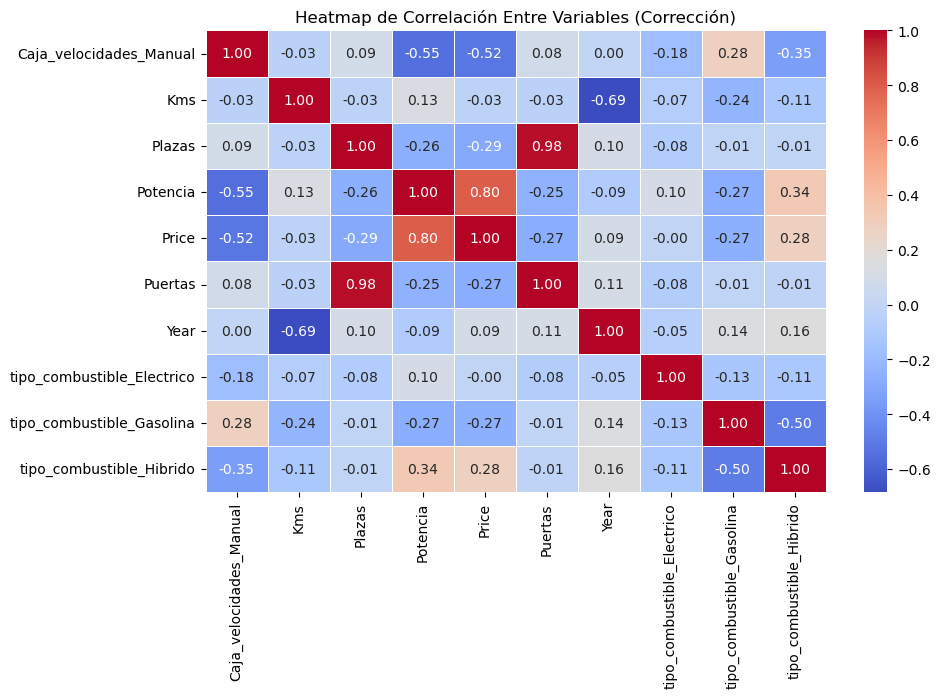

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación con todas las columnas
correlation_matrix = df_scaled.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación Entre Variables (Corrección)")
plt.show()

Paso 5: Eliminar Puertas

In [206]:
# Eliminar la columna 'Puertas'
df_scaled = df_scaled.drop(columns=['Puertas'])

# Verificar que la columna ha sido eliminada
print("Columnas después de eliminar 'Puertas':")
print(df_scaled.columns)

Columnas después de eliminar 'Puertas':
Index(['Caja_velocidades_Manual', 'Kms', 'Plazas', 'Potencia', 'Price', 'Year',
       'tipo_combustible_Electrico', 'tipo_combustible_Gasolina',
       'tipo_combustible_Hibrido'],
      dtype='object')


Paso 6: Aplicar PCA

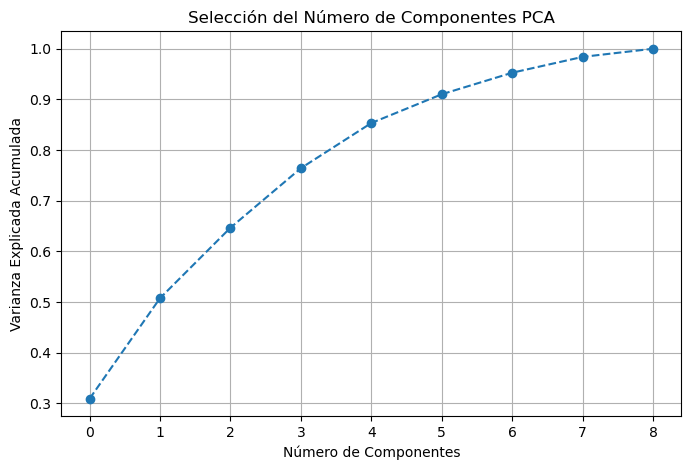

In [207]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA sin limitar el número de componentes (para analizar la varianza explicada)
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección del Número de Componentes PCA")
plt.grid()
plt.show()

Paso 7: Aplicar PCA con 5 Componentes

In [208]:
# Aplicar PCA con 5 componentes
pca = PCA(n_components=5)
df_pca_final = pca.fit_transform(df_scaled)

# Convertir a DataFrame
df_pca_final = pd.DataFrame(df_pca_final, columns=[f"PC{i+1}" for i in range(5)])

# Verificar las primeras filas del dataset reducido
print("Primeras filas del dataset con PCA aplicado:")
print(df_pca_final.head())

Primeras filas del dataset con PCA aplicado:
        PC1       PC2       PC3       PC4       PC5
0  0.620345 -0.229219 -2.957565 -0.973192 -1.310731
1  0.686591 -0.227432 -2.984498 -1.003889 -1.284482
2 -0.697985 -2.378986  0.571023 -0.143086 -0.247913
3  1.947724  0.032860 -1.817223 -0.884409  2.071039
4  1.134860 -2.757862  0.122108 -0.059466  0.850722


Paso 8: Determinar el Mejor Número de Clusters con el Método del Codo

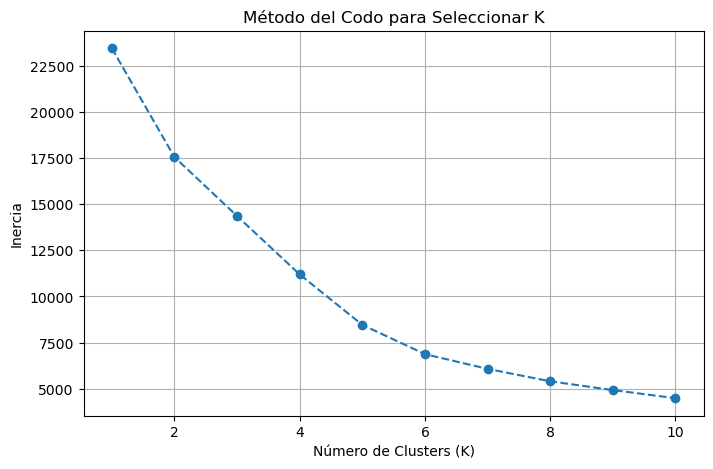

In [209]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar diferentes valores de K
inertia = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca_final)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Seleccionar K")
plt.grid()
plt.show()

Paso 9: Aplicar K-Means con K=6 y Evaluar con Silhouette Score

In [210]:
from sklearn.metrics import silhouette_score

# Aplicar K-Means con K=6
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_pca_final["Cluster_KMeans"] = kmeans.fit_predict(df_pca_final)

# Evaluar con Silhouette Score
silhouette_k6 = silhouette_score(df_pca_final.drop(columns=["Cluster_KMeans"]), df_pca_final["Cluster_KMeans"])
print(f"Silhouette Score para K=6: {silhouette_k6:.4f}")

Silhouette Score para K=6: 0.3706


In [211]:
# Aplicar K-Means con K=7
kmeans_k7 = KMeans(n_clusters=7, random_state=42, n_init=10)
df_pca_final["Cluster_KMeans"] = kmeans_k7.fit_predict(df_pca_final)

# Evaluar con Silhouette Score
silhouette_k7 = silhouette_score(df_pca_final.drop(columns=["Cluster_KMeans"]), df_pca_final["Cluster_KMeans"])
print(f"Silhouette Score para K=7: {silhouette_k7:.4f}")

Silhouette Score para K=7: 0.3616


Paso 11: Aplicar DBSCAN

In [212]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Aplicar DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=10)
df_pca_final["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca_final.drop(columns=["Cluster_KMeans"]))

# Contar cuántos puntos hay en cada cluster
print("Distribución de Clusters DBSCAN:")
print(df_pca_final["DBSCAN_Cluster"].value_counts())

# Calcular el Silhouette Score (solo si hay más de 1 cluster)
if len(set(df_pca_final["DBSCAN_Cluster"])) > 1:
    silhouette_dbscan = silhouette_score(df_pca_final.drop(columns=["DBSCAN_Cluster", "Cluster_KMeans"]), df_pca_final["DBSCAN_Cluster"])
    print(f"Silhouette Score con DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN detectó solo un cluster. Ajusta 'eps' o 'min_samples'.")

Distribución de Clusters DBSCAN:
DBSCAN_Cluster
 2    1077
 0     921
 1     913
-1      72
 3      72
Name: count, dtype: int64
Silhouette Score con DBSCAN: 0.2817


Paso 12: Visualizar los Clusters de DBSCAN

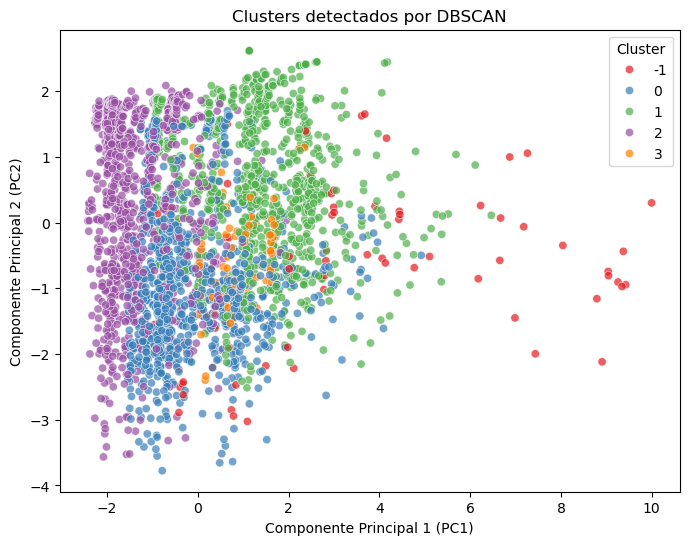

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los clusters detectados por DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["DBSCAN_Cluster"], palette="Set1", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por DBSCAN")
plt.legend(title="Cluster")
plt.show()

Paso 13.1: Filtrar Solo Variables Numéricas y Normalizar

In [214]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las variables numéricas indicadas
numeric_features = ["Kms", "Plazas", "Potencia", "Price", "Year"]
df_selected = df[numeric_features]

# Aplicar normalización con StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convertir a DataFrame con nombres de columnas
df_scaled = pd.DataFrame(df_scaled, columns=numeric_features)

# Verificar que solo tenemos las columnas seleccionadas
print("Columnas después de la selección y normalización:")
print(df_scaled.head())

Columnas después de la selección y normalización:
        Kms    Plazas  Potencia     Price      Year
0  0.049973 -3.437967  0.456655 -0.101544 -0.072287
1  0.070678 -3.437967  0.456655  0.028725 -0.072287
2  2.007509  0.117547 -0.342615 -0.587089 -1.014017
3 -0.159387  0.117547  2.499236  1.769582 -0.543152
4  1.874674  0.117547  0.723079  0.135308 -1.955748


Paso 13.2: Visualizar el Heatmap de Correlación

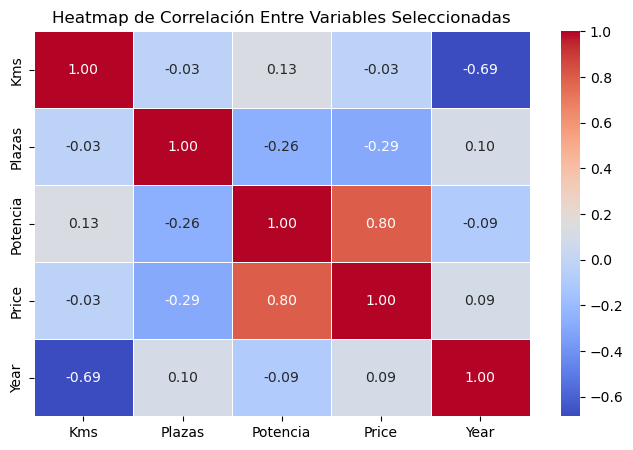

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación con las variables seleccionadas
correlation_matrix = df_scaled.corr()

# Graficar el heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación Entre Variables Seleccionadas")
plt.show()

Paso 14: Aplicar PCA con el Dataset Reducido

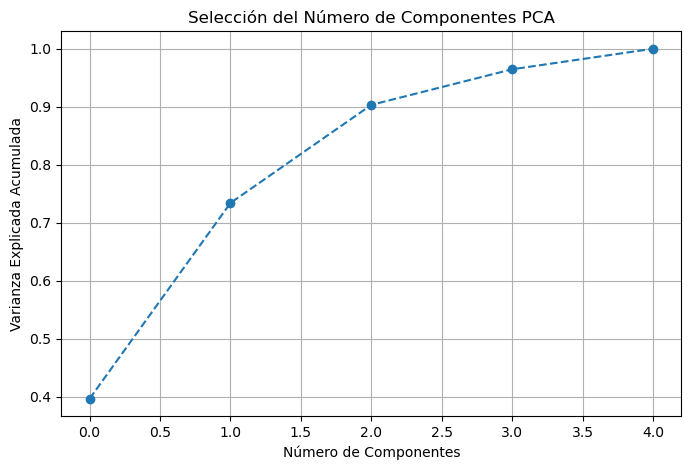

In [216]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Aplicar PCA sin limitar el número de componentes para analizar la varianza explicada
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección del Número de Componentes PCA")
plt.grid()
plt.show()

Paso 15: Aplicar PCA con 3 Componentes

In [217]:
# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
df_pca_final = pca.fit_transform(df_scaled)

# Convertir a DataFrame con nombres de columnas
df_pca_final = pd.DataFrame(df_pca_final, columns=["PC1", "PC2", "PC3"])

# Verificar la transformación
print("Primeras filas del dataset con PCA aplicado (3 componentes):")
print(df_pca_final.head())

Primeras filas del dataset con PCA aplicado (3 componentes):
        PC1       PC2       PC3
0  1.547566  0.048048 -3.042888
1  1.631338  0.070570 -3.011216
2 -0.026682 -2.236070  0.123309
3  2.704015  0.533899  1.193886
4  1.241741 -2.455735  0.547106


Paso 16: Aplicar K-Means y Evaluar con Silhouette Score

In [218]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definir número de clusters basado en el método del codo anterior (probamos con 6 y 7)
K_values = [6, 7]
silhouette_scores = {}

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_pca_final)
    score = silhouette_score(df_pca_final, clusters)
    silhouette_scores[k] = score
    print(f"Silhouette Score para K={k}: {score:.4f}")

Silhouette Score para K=6: 0.3735
Silhouette Score para K=7: 0.3757


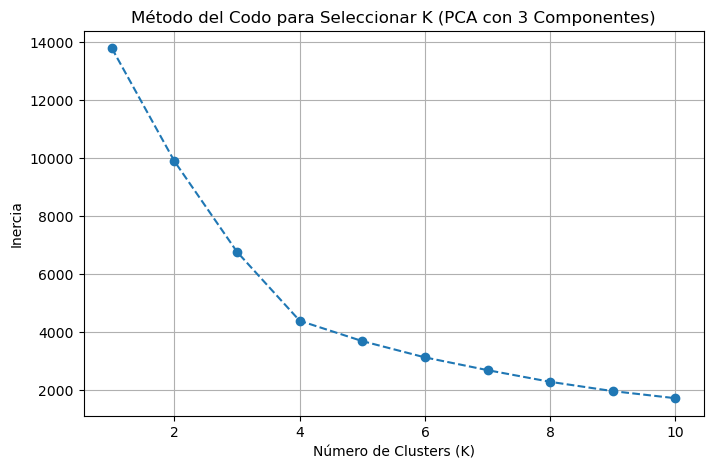

In [219]:
import matplotlib.pyplot as plt

# Probar diferentes valores de K
inertia = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca_final)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_values, inertia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Seleccionar K (PCA con 3 Componentes)")
plt.grid()
plt.show()

In [220]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-Means con K=4
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_pca_final["Cluster_KMeans"] = kmeans_k4.fit_predict(df_pca_final)

# Evaluar con Silhouette Score
silhouette_k4 = silhouette_score(df_pca_final.drop(columns=["Cluster_KMeans"]), df_pca_final["Cluster_KMeans"])
print(f"Silhouette Score para K=4: {silhouette_k4:.4f}")

Silhouette Score para K=4: 0.4471


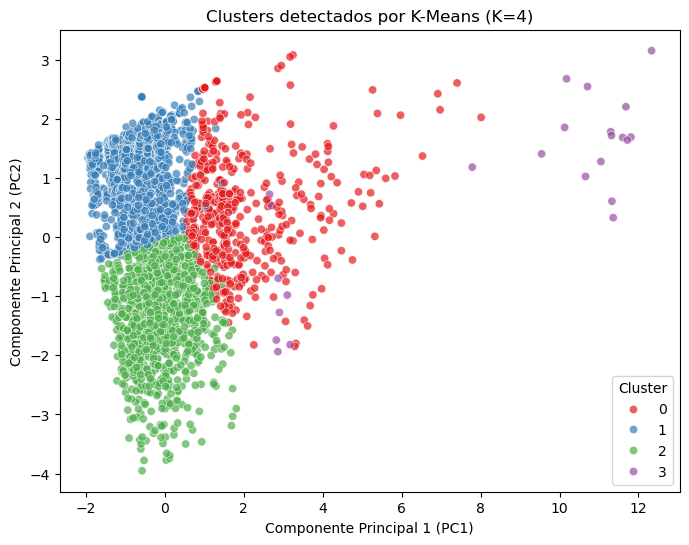

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los clusters detectados por K-Means (K=4)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Cluster_KMeans"], palette="Set1", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por K-Means (K=4)")
plt.legend(title="Cluster")
plt.show()

Paso 18: Determinar el Mejor eps con el Gráfico de Distancias

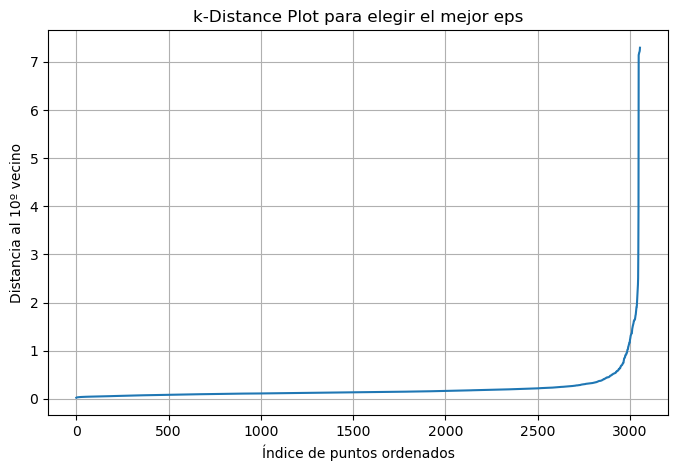

In [222]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Definir el número de vecinos (10 es un buen valor inicial)
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df_pca_final)
distances, indices = neighbors_fit.kneighbors(df_pca_final)

# Ordenar las distancias y graficar
distances = np.sort(distances[:, -1])  # Última columna (distancia al 10º vecino)
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Índice de puntos ordenados")
plt.ylabel("Distancia al 10º vecino")
plt.title("k-Distance Plot para elegir el mejor eps")
plt.grid()
plt.show()

Paso 19: Aplicar DBSCAN con eps=1.3 y min_samples=10

In [223]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Aplicar DBSCAN con eps=1.3 y min_samples=10
dbscan = DBSCAN(eps=1.3, min_samples=10)
df_pca_final["DBSCAN_Cluster"] = dbscan.fit_predict(df_pca_final)

# Contar cuántos puntos hay en cada cluster
print("Distribución de Clusters DBSCAN:")
print(df_pca_final["DBSCAN_Cluster"].value_counts())

# Calcular el Silhouette Score (solo si hay más de 1 cluster)
if len(set(df_pca_final["DBSCAN_Cluster"])) > 1:
    silhouette_dbscan = silhouette_score(df_pca_final.drop(columns=["DBSCAN_Cluster"]), df_pca_final["DBSCAN_Cluster"])
    print(f"Silhouette Score con DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN detectó solo un cluster. Ajusta 'eps' o 'min_samples'.")

Distribución de Clusters DBSCAN:
DBSCAN_Cluster
 0    2998
-1      29
 1      16
 2      12
Name: count, dtype: int64
Silhouette Score con DBSCAN: 0.4617


In [224]:
# Aplicar DBSCAN con eps=1.0 y min_samples=5
dbscan_tuned = DBSCAN(eps=0.7, min_samples=7)
df_pca_final["DBSCAN_Tuned_Cluster"] = dbscan_tuned.fit_predict(df_pca_final)

# Contar cuántos puntos hay en cada cluster
print("Distribución de Clusters DBSCAN Ajustado:")
print(df_pca_final["DBSCAN_Tuned_Cluster"].value_counts())

# Calcular el Silhouette Score (solo si hay más de 1 cluster)
if len(set(df_pca_final["DBSCAN_Tuned_Cluster"])) > 1:
    silhouette_dbscan_tuned = silhouette_score(df_pca_final.drop(columns=["DBSCAN_Tuned_Cluster"]), df_pca_final["DBSCAN_Tuned_Cluster"])
    print(f"Nuevo Silhouette Score con DBSCAN Ajustado: {silhouette_dbscan_tuned:.4f}")
else:
    print("DBSCAN detectó solo un cluster. Ajusta 'eps' o 'min_samples' nuevamente.")

Distribución de Clusters DBSCAN Ajustado:
DBSCAN_Tuned_Cluster
 2    1334
 0    1212
 1     441
-1      54
 3       7
 4       7
Name: count, dtype: int64
Nuevo Silhouette Score con DBSCAN Ajustado: 0.5089


In [225]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Rango de valores a probar
eps_values = np.arange(0.5, 1.5, 0.1)  # De 0.5 a 1.5 con paso de 0.1
min_samples_values = range(3, 10)  # De 3 a 10

best_eps = None
best_min_samples = None
best_score = -1
best_clusters = None

# Explorar combinaciones de eps y min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_pca_final)

        # Solo calcular el Silhouette Score si hay más de un cluster
        if len(set(clusters)) > 1:
            score = silhouette_score(df_pca_final, clusters)

            # Guardar la mejor configuración
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = clusters

# Aplicar la mejor configuración encontrada
df_pca_final["Best_DBSCAN_Cluster"] = best_clusters

# Mostrar los mejores parámetros y el mejor Silhouette Score
print(f"Mejor eps: {best_eps}")
print(f"Mejor min_samples: {best_min_samples}")
print(f"Mejor Silhouette Score: {best_score:.4f}")

# Ver distribución de clusters en la mejor configuración
print("\nDistribución de Clusters en la Mejor Configuración DBSCAN:")
print(pd.Series(best_clusters).value_counts())

Mejor eps: 1.2999999999999998
Mejor min_samples: 6
Mejor Silhouette Score: 0.5972

Distribución de Clusters en la Mejor Configuración DBSCAN:
 3    1334
 1    1214
 2     441
-1      27
 4       9
 5       9
 0       7
 6       7
 7       7
Name: count, dtype: int64


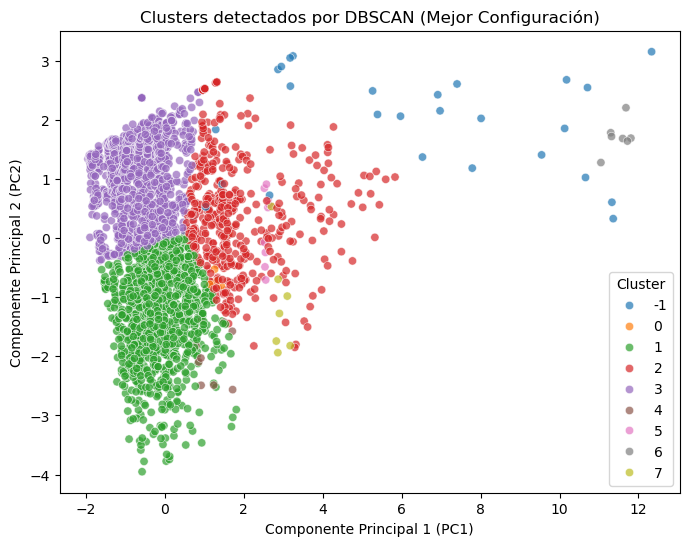

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los clusters detectados por DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Best_DBSCAN_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por DBSCAN (Mejor Configuración)")
plt.legend(title="Cluster")
plt.show()

In [227]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores de K a probar (de 2 a 15 clusters)
K_values = range(2, 15)

best_k = None
best_score = -1
best_clusters = None

# Explorar diferentes valores de K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_pca_final)

    # Calcular el Silhouette Score
    score = silhouette_score(df_pca_final, clusters)

    # Guardar la mejor configuración
    if score > best_score:
        best_score = score
        best_k = k
        best_clusters = clusters

# Aplicar la mejor configuración encontrada
df_pca_final["Best_KMeans_Cluster"] = best_clusters

# Mostrar los mejores parámetros y el mejor Silhouette Score
print(f"Mejor K: {best_k}")
print(f"Mejor Silhouette Score con K-Means: {best_score:.4f}")

# Ver distribución de clusters en la mejor configuración de K-Means
print("\nDistribución de Clusters en la Mejor Configuración K-Means:")
print(pd.Series(best_clusters).value_counts())

Mejor K: 4
Mejor Silhouette Score con K-Means: 0.6252

Distribución de Clusters en la Mejor Configuración K-Means:
1    1334
2    1234
0     463
3      24
Name: count, dtype: int64


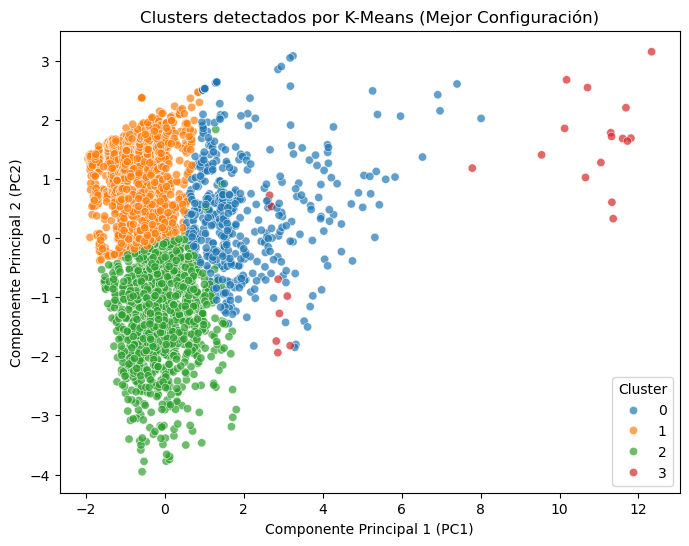

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los clusters detectados por K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Best_KMeans_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por K-Means (Mejor Configuración)")
plt.legend(title="Cluster")
plt.show()

Mejor K (Divisive Clustering): 5
Mejor Silhouette Score con Divisive Clustering: 0.6505

Distribución de Clusters en la Mejor Configuración Divisive Clustering:
2    1334
1    1214
0     454
3      37
4      16
Name: count, dtype: int64


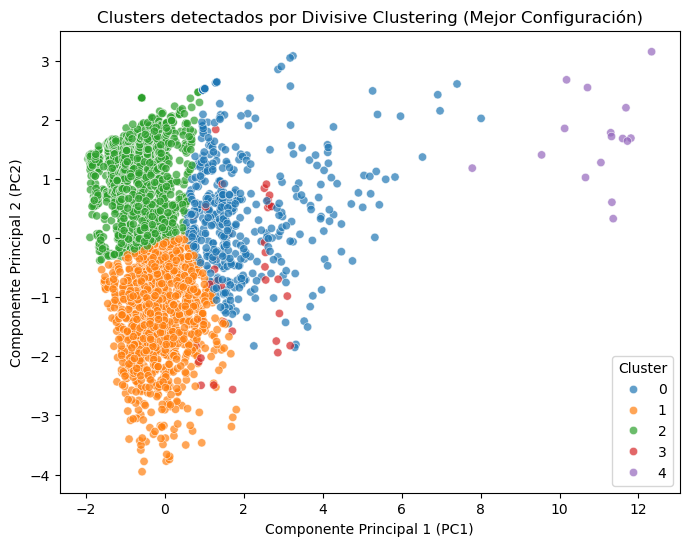

In [229]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rango de valores de K a probar (de 2 a 15 clusters)
K_values = range(2, 15)

best_k = None
best_score = -1
best_clusters = None

# Explorar diferentes valores de K
for k in K_values:
    divisive = AgglomerativeClustering(n_clusters=k, linkage="ward")  # Simula divisive clustering
    clusters = divisive.fit_predict(df_pca_final)

    # Calcular el Silhouette Score
    score = silhouette_score(df_pca_final, clusters)

    # Guardar la mejor configuración
    if score > best_score:
        best_score = score
        best_k = k
        best_clusters = clusters

# Aplicar la mejor configuración encontrada
df_pca_final["Best_Divisive_Cluster"] = best_clusters

# Mostrar los mejores parámetros y el mejor Silhouette Score
print(f"Mejor K (Divisive Clustering): {best_k}")
print(f"Mejor Silhouette Score con Divisive Clustering: {best_score:.4f}")

# Ver distribución de clusters en la mejor configuración de Divisive Clustering
print("\nDistribución de Clusters en la Mejor Configuración Divisive Clustering:")
print(pd.Series(best_clusters).value_counts())

# Graficar los clusters detectados por Divisive Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Best_Divisive_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por Divisive Clustering (Mejor Configuración)")
plt.legend(title="Cluster")
plt.show()

Silhouette Score con Mean-Shift: 0.6861

Distribución de Clusters en Mean-Shift:
0     1334
1     1214
2      437
5       12
4        9
3        9
8        7
6        7
7        7
10       5
9        5
11       4
12       3
13       1
14       1
Name: count, dtype: int64


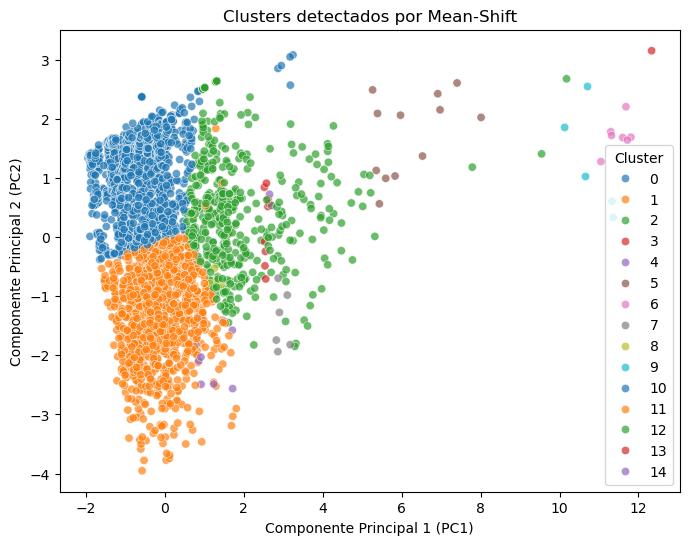

In [230]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar Mean-Shift Clustering
mean_shift = MeanShift()
clusters = mean_shift.fit_predict(df_pca_final)

# Guardar los clusters en el dataset
df_pca_final["Best_MeanShift_Cluster"] = clusters

# Calcular el Silhouette Score
if len(set(clusters)) > 1:
    silhouette_meanshift = silhouette_score(df_pca_final.drop(columns=["Best_MeanShift_Cluster"]), clusters)
    print(f"Silhouette Score con Mean-Shift: {silhouette_meanshift:.4f}")
else:
    print("Mean-Shift detectó solo un cluster. Puede ser necesario ajustar parámetros.")

# Ver distribución de clusters en la mejor configuración de Mean-Shift
print("\nDistribución de Clusters en Mean-Shift:")
print(pd.Series(clusters).value_counts())

# Graficar los clusters detectados por Mean-Shift
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Best_MeanShift_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por Mean-Shift")
plt.legend(title="Cluster")
plt.show()

c:\Users\David\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-p

Mejor K (Spectral Clustering): 5
Mejor Silhouette Score con Spectral Clustering: 0.6913

Distribución de Clusters en la Mejor Configuración Spectral Clustering:
1    1334
0    1214
2     453
4      29
3      25
Name: count, dtype: int64


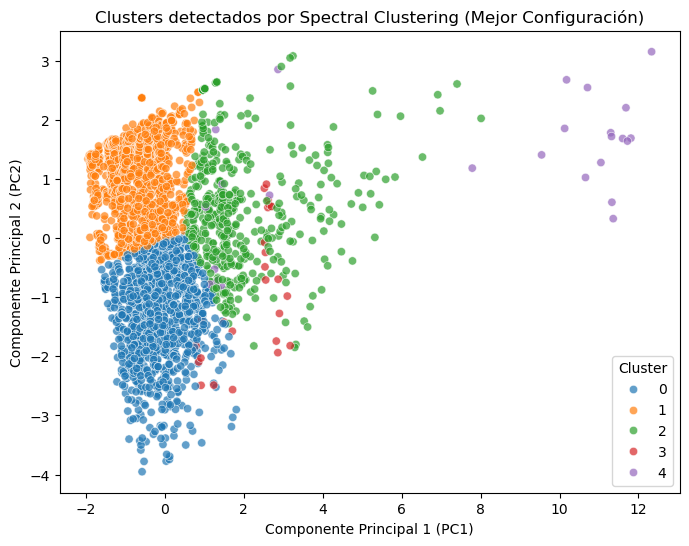

In [231]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rango de valores de K a probar (de 2 a 15 clusters)
K_values = range(2, 15)

best_k = None
best_score = -1
best_clusters = None

# Explorar diferentes valores de K
for k in K_values:
    spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
    clusters = spectral.fit_predict(df_pca_final)

    # Calcular el Silhouette Score
    score = silhouette_score(df_pca_final, clusters)

    # Guardar la mejor configuración
    if score > best_score:
        best_score = score
        best_k = k
        best_clusters = clusters

# Aplicar la mejor configuración encontrada
df_pca_final["Best_Spectral_Cluster"] = best_clusters

# Mostrar los mejores parámetros y el mejor Silhouette Score
print(f"Mejor K (Spectral Clustering): {best_k}")
print(f"Mejor Silhouette Score con Spectral Clustering: {best_score:.4f}")

# Ver distribución de clusters en la mejor configuración de Spectral Clustering
print("\nDistribución de Clusters en la Mejor Configuración Spectral Clustering:")
print(pd.Series(best_clusters).value_counts())

# Graficar los clusters detectados por Spectral Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Best_Spectral_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por Spectral Clustering (Mejor Configuración)")
plt.legend(title="Cluster")
plt.show()

Mejor K (Agglomerative Clustering): 7
Mejor Silhouette Score con Agglomerative Clustering: 0.7097

Distribución de Clusters en la Mejor Configuración Agglomerative Clustering:
2    1334
0    1214
3     437
1      25
5      17
4      16
6      12
Name: count, dtype: int64


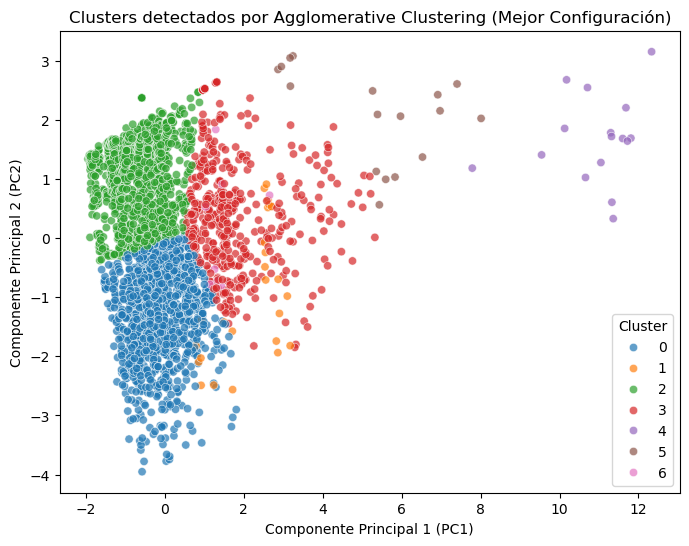

In [232]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rango de valores de K a probar (de 2 a 15 clusters)
K_values = range(2, 15)

best_k = None
best_score = -1
best_clusters = None

# Explorar diferentes valores de K
for k in K_values:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage="ward")
    clusters = agglomerative.fit_predict(df_pca_final)

    # Calcular el Silhouette Score
    score = silhouette_score(df_pca_final, clusters)

    # Guardar la mejor configuración
    if score > best_score:
        best_score = score
        best_k = k
        best_clusters = clusters

# Aplicar la mejor configuración encontrada
df_pca_final["Best_Agglomerative_Cluster"] = best_clusters

# Mostrar los mejores parámetros y el mejor Silhouette Score
print(f"Mejor K (Agglomerative Clustering): {best_k}")
print(f"Mejor Silhouette Score con Agglomerative Clustering: {best_score:.4f}")

# Ver distribución de clusters en la mejor configuración de Agglomerative Clustering
print("\nDistribución de Clusters en la Mejor Configuración Agglomerative Clustering:")
print(pd.Series(best_clusters).value_counts())

# Graficar los clusters detectados por Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_final["PC1"], y=df_pca_final["PC2"], hue=df_pca_final["Best_Agglomerative_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Clusters detectados por Agglomerative Clustering (Mejor Configuración)")
plt.legend(title="Cluster")
plt.show()

In [233]:
# Guardar el dataset con los clusters de Divisive Clustering
df_pca_final["Divisive_Cluster"] = df_pca_final["Best_Divisive_Cluster"]  # Renombrar si es necesario

# Guardar en CSV
df_pca_final.to_csv("dataset_clusterizado_divisive.csv", index=False)

print("✅ Dataset guardado como 'dataset_clusterizado_divisive.csv'")


✅ Dataset guardado como 'dataset_clusterizado_divisive.csv'


In [234]:
import pandas as pd

# Recuperar el dataset original (después de encoding y limpieza)
df_final = df.copy()  # Usar el DataFrame original que contenía las variables limpias y codificadas

# Agregar la columna de clusters desde df_pca_final
df_final["Divisive_Cluster"] = df_pca_final["Divisive_Cluster"].values

# Guardar en CSV
df_final.to_csv("dataset_final_divisive.csv", index=False)

print("✅ Dataset guardado como 'dataset_final_divisive.csv'")


✅ Dataset guardado como 'dataset_final_divisive.csv'
